In [133]:
# Import dependancies
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from scipy.io import arff

In [134]:
#Preprocessing and loading data by filling in empty spaces
file = arff.loadarff('chronic_kidney_disease_full.arff')
df = pd.DataFrame(file[0])

for i in df.columns:
        if df[i].dtype !=  'float64':
            lab = LabelEncoder()
            lab.fit(df[i])
            df[i] = lab.transform(df[i])

In [135]:
#Fill empty values of dataset
df.fillna(method = 'ffill', inplace = True)
df.fillna(method = 'bfill', inplace = True)


X = df.iloc[:, :-1].values
Y = df['class'].values

In [136]:
# Normalize data
scale = StandardScaler()
X = scale.fit_transform(X)

In [137]:
# Dividing the dataset for training and testing such that 20 % is used for testing
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

In [138]:
#Initialize parameters
def parameters(siz):
    w = np.random.rand(siz,1)
    b = 0.0
    return w, b

In [139]:
#Define sigmoid function
def logistic(z):
    return 1 / (1 + np.exp(-z))

In [140]:
def propagation(w,b,x,y,laba):
    m = x.shape[0]
    A = logistic(np.dot(x,w)+b)
    J = (np.sum((np.dot(y,np.log(A).T))+(np.dot((1-y),np.log(1-A).T)))/-m)+(laba*(np.sum(np.square(w))/2*m))
    dw = (np.dot(x.T,(A-y))/m)
    db = (np.sum(A-y))/m
    J = np.squeeze(np.array(J))
    return J,dw,db


In [141]:
def model(x_train,y_train,x_test,y_test,num_iter,alpha,laba):
    w,b = parameters(x_train.shape[1])
    w,b,dw,db,cost = optimization(w,b,x_train,y_train,num_iter,alpha,laba)
    y_prediction_train = find(w,b,x_train)
    y_prediction_test = find(w,b,x_test)
    return y_prediction_test,y_prediction_train

In [142]:

def optimization(w, b, x, y, num_iter, alpha, laba):
    m = x.shape[0]
    b = copy.deepcopy(b)
    w = copy.deepcopy(w)
    cost = []

    for i in range(num_iter):
        J, dw, db = propagation(w, b, x, y, laba);
        b = b - (alpha * db) - ((laba * b) / m)
        w = w - (alpha * dw) - ((laba * w) / m)
        cost.append(J)
    return w, b, dw, db, cost



In [143]:
def fmeasure(pred, y_test):
    TP, TN, FP, FN = 0,0,0,0

    for i in range(y_test.shape[0]):
        if pred[i] == 0:
            if pred[i] == y_test[i]:
                TN = TN + 1
            else:
                FN = FN + 1
        else:
            if pred[i] == y_test[i]:
                TP = TP + 1
            else:
                FP = FP + 1

    rec = TP / (TP + FN)
    pre = TP / (TP + FP)

    fm = (2 * pre * rec) / (pre + rec)
    return fm

In [144]:
#Function to predict label
def find(w, b, x):
    m = x.shape[0]
    y_predict = np.zeros((m, 1))

    A = logistic(np.dot(x, w) + b)
    for i in range(A.shape[0]):
        if A[i] > 0.5:
            y_predict[i] = 1
        else:
            y_predict[i] = 0
    return y_predict

<ipython-input-140-362f290b788a>:4: RuntimeWarning: divide by zero encountered in log
  J = (np.sum((np.dot(y,np.log(A).T))+(np.dot((1-y),np.log(1-A).T)))/-m)+(laba*(np.sum(np.square(w))/2*m))
<ipython-input-139-982ea68760ec>:3: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


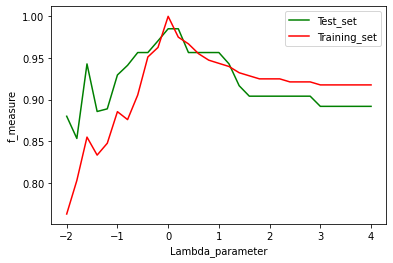

In [145]:
#Iterating model for lambda in the range from -2 to 4 and step 0.2
test_set = []
training_set = []
lmda = [-2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4 ]

for i in lmda:
    y_test_pred,y_train_pred = model(x_train,y_train,x_test,y_test,num_iter=10000,alpha=0.008, laba =i)
    test_set.append(fmeasure(y_test_pred,y_test))
    training_set.append(fmeasure(y_train_pred,y_train))



plt.plot(lmda , test_set , label='Test_set', color = 'green')
plt.plot(lmda , training_set , label='Training_set', color = 'red')
#Assign labels for f-measure plots
plt.xlabel('Lambda_parameter')
plt.ylabel('f_measure')

plt.legend()
plt.show()